### Введение в машинное

<b>Цель проекта:</b> построить модель для задачи классификации, которая выберет подходящий тариф

<b>Исходные данные:</b> 

   - сalls — количество звонков,
   - minutes — суммарная длительность звонков в минутах,
   - messages — количество sms-сообщений,
   - mb_used — израсходованный интернет-трафик в Мб,
   - is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

### Откройте файл с данными и изучите его.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

#модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#метики
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#визуализация
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    data_mob=pd.read_csv('desktop/datasets/users_behavior.csv')
except:
    data_mob=pd.read_csv('/datasets/users_behavior.csv')

data_mob.head()    

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
#общая информация о датасете
data_mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data_mob.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
#проверим наличие дубликатов
data_mob.duplicated().sum()

0

In [6]:
data_mob.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

<b>Вывод:</b> 

С данными все в порядке, нет пропусков, дубликатов, типы данных сответствуют, нет отрицательных значений.

#### Разделите исходные данные на обучающую, валидационную и тестовую выборки.

In [7]:
#разбиваем данные на выборки по принципу 3:1:1 
#(60% тренировочная, 20% валидационная, 20% тестовая)
data_mob_train, data_mob_valid = train_test_split(data_mob, test_size=0.4, random_state=12345)
data_mob_valid,data_mob_test = train_test_split(data_mob_valid, test_size=0.5, random_state=12345)

In [8]:
#посмотрим что получилось
print('Размер обучающей выборки:', data_mob_train.shape[0],'объектов')
print('Размер валидационной выборки:', data_mob_valid.shape[0],'объекта')
print('Размер тестовой выборки:',data_mob_test.shape[0],'объекта')

Размер обучающей выборки: 1928 объектов
Размер валидационной выборки: 643 объекта
Размер тестовой выборки: 643 объекта


In [9]:
#выделяем признаки и целевую переменную

# тренировочная выборка
features_train = data_mob_train.drop('is_ultra', axis=1)
target_train = data_mob_train['is_ultra']
# валидационная выборка
features_valid = data_mob_valid.drop('is_ultra', axis=1)
target_valid = data_mob_valid['is_ultra']
# тестовая выборка
features_test = data_mob_test.drop('is_ultra', axis=1)
target_test = data_mob_test['is_ultra']

### 3. Исследуйте модели

In [10]:
#создадим функцию, которая будет визуализировать зависимость изменения 
#качества от изменения гиперпараметров

def drawind_scores(data_d,data_accur,xlab):
    plt.figure(figsize=(12, 5))
    sns.set_style('darkgrid') 
    sns.lineplot(x=data_d, y=data_accur,color='g',alpha=0.5)
    plt.title('Cравнение accuracy при разной {}'.format(xlab), fontsize=12) 
    plt.ylabel('аccuracies') 
    plt.xlabel(xlab)
    plt.show()    

#### Дерево решений

Глубина (depth): 1 --> Качество (accuracy): 0.7542768273716952
Глубина (depth): 2 --> Качество (accuracy): 0.7822706065318819
Глубина (depth): 3 --> Качество (accuracy): 0.7853810264385692
Глубина (depth): 4 --> Качество (accuracy): 0.7791601866251944
Глубина (depth): 5 --> Качество (accuracy): 0.7791601866251944
Глубина (depth): 6 --> Качество (accuracy): 0.7838258164852255
Глубина (depth): 7 --> Качество (accuracy): 0.7822706065318819
Глубина (depth): 8 --> Качество (accuracy): 0.7791601866251944
Глубина (depth): 9 --> Качество (accuracy): 0.7822706065318819
Глубина (depth): 10 --> Качество (accuracy): 0.7744945567651633


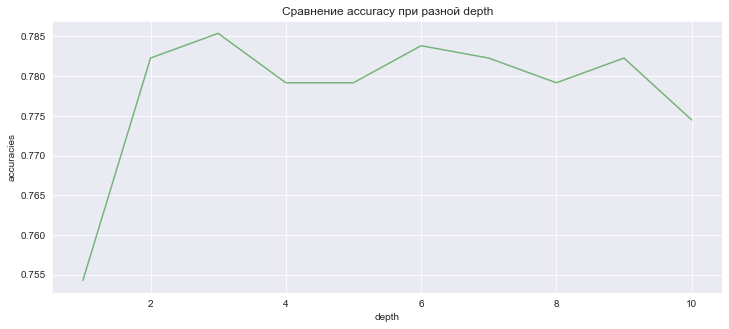

In [11]:
#обучим модель Дерево Решений + проверим разную глубину

#создадим пустые списки для фиксирования глубины и качества 
depths = []
accuracies_dt = []


for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train,target_train)
    dt_predictions = model.predict(features_valid)
    dt_result = accuracy_score(target_valid, dt_predictions)
    
    depths.append(depth)
    accuracies_dt.append(dt_result)
     
    print('Глубина (depth):', depth, '-->', end=' ')
    print('Качество (accuracy):', dt_result)

    
#посмотрим для удобства изменения на графике 
drawind_scores(depths,accuracies_dt,'depth')

#### Случайный лес

Estimators: 1 --> Качество (accuracy): 0.7107309486780715
Estimators: 11 --> Качество (accuracy): 0.7838258164852255
Estimators: 21 --> Качество (accuracy): 0.7931570762052877
Estimators: 31 --> Качество (accuracy): 0.7822706065318819
Estimators: 41 --> Качество (accuracy): 0.7869362363919129
Estimators: 51 --> Качество (accuracy): 0.7916018662519441
Estimators: 61 --> Качество (accuracy): 0.7807153965785381
Estimators: 71 --> Качество (accuracy): 0.7807153965785381
Estimators: 81 --> Качество (accuracy): 0.7807153965785381
Estimators: 91 --> Качество (accuracy): 0.7838258164852255
Estimators: 101 --> Качество (accuracy): 0.7853810264385692


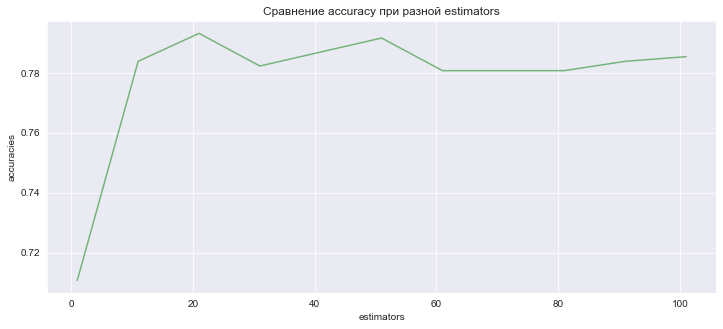

In [12]:
#обучим модель Случайный лес + проверим разное количество деревьев
#создадим пустые списки для фиксирования числа деревьев и качества

estimators = []
accuracies_rf = []

for est in range(1,111,10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train,target_train)
    rf_predictions = model.predict(features_valid)
    rf_result = accuracy_score(target_valid, rf_predictions)
    
    estimators.append(est)
    accuracies_rf.append(rf_result)
    
    print('Estimators:', est, '-->', end=' ')
    print('Качество (accuracy):', rf_result)
    
#посмотрим на графике
drawind_scores(estimators,accuracies_rf,'estimators')

#### Случайный лес + смена параметров

In [13]:
#обучим модель Случайный лес 
# + проведем эксперимент с разным количеством деревьев + одновременно глубиной дерева

best_result=0
best_estimators=0
best_depth=0

#создадим двойной цикл по числу деревьев и глубине дерева

for est in range(1,11):
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(features_train,target_train)
        rf_predictions = model.predict(features_valid)
        rf_result = accuracy_score(target_valid, rf_predictions)
        
        #поиск лучшей модели из множества вариантов
        if rf_result > best_result:
            best_estimators=est 
            best_result=rf_result
            best_depth=depth
            
print('Лучшая модель:',best_result, 'estimators:', best_estimators, 'глубина:', best_depth )

Лучшая модель: 0.80248833592535 estimators: 8 глубина: 8


#### Логистическая регрессия

In [14]:
#обучим модель Логистическая регрессия + проверим 

log_model = LogisticRegression(random_state=12345)
log_model.fit(features_train,target_train)

log_predictions = log_model.predict(features_valid)
log_result = accuracy_score(target_valid, log_predictions)

print('Качество на Логистической регрессии --->',log_result)

Качество на Логистической регрессии ---> 0.7107309486780715


<b>Вывод по изучению моделей</b>:

В результате анализа были получены следующие результаты по моделям:
    
   - DecisionTreeClassifier показала лучшее значение при глубине (depth): 3, accuracy составило <b>0.7854</b>
   - RandomForestClassifier показал лучшее значение при числе деревьев (estimators): 21, accuracy составило <b>0.79316</b>
   - RandomForestClassifier с одновременной отработкой числа деревьев и глубины показала лучшее значение accuracy: <b> 0.8025</b> (estimators: 8 глубина: 8), проверим ее на тестовой выборке;
   - LogisticRegression показала лучшее значение <b> 0.7107 </b>
 

### 4. Проверьте модель на тестовой выборке¶


In [17]:
#теперь проверим на тестовой выборке 
model = RandomForestClassifier(random_state=12345, n_estimators=8, max_depth=8)
model.fit(features_train,target_train)
predictions = model.predict(features_test)
result = accuracy_score(target_test, predictions)
print('На тестовой выборке значение Accuracy:', result)

На тестовой выборке значение Accuracy: 0.7962674961119751


<b>Вывод:</b>
На тестовой выборке по подобранной модели получено значение Accuracy: <b>0.7962674961119751</b>

### 5. Проверьте модели на адекватность

Учитывая, что в данных 70% пользователей выбирают "Smart",в случает случайного выбора у нас будет в 70% предсказание - Smart. Наша модель точнее.

In [16]:
data_mob['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

### 6. Общий вывод

<b>1.</b> При подготовке датасета к обучению он был проанализирован на наличие дубликатов, пропусков, несоответствия типов данных и отрицательных значений. Были применены методы: 
- info()
- decribe()
- duplicated().sum()
- isnull().sum()
Никаких отклонений найдено не было.

<b>2.</b> Было произведено разделение датасета на обучающую, валидационную и тестовую выборки в размере 3:1:1 (60%,20%,20%)

<b>3.</b> Были проанализированы следующие модели:

    DecisionTreeClassifier 
    RandomForestClassifier 
    LogisticRegression 
 
Были изменены гиперпараметры:
 - у модели DecisionTreeClassifier менялось глубтина дерева (от 1 до 10)
 - у модели RandomForestClassifier  в одном случае менялось число деревьев, в другом - глубина дерева + число деревьев;

На основе сравнительного анализа была выбрана наиболее точная модель - RandomForestClassifier показавшая значение accuracy: 0.8025 (estimators: 8 глубина: 8)
 
<b>4.</b> Наиболее точная модель была опробована на тестовой выборке, показав значение Accuracy: 0.7962674961119751
 
<b>5.</b> Оценена адекватность модели, сделан вывод, что в случае если бы модель предсказывала SMart, она бы делала это в 70%, точность выбранной модели 80%.